# Review session - CLV example

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import pyrsm as rsm

In [2]:
rsm.__version__ # should be 0.9.26 or higher

'0.9.26'

In [3]:
# run the code below to update pyrsm
# %pip install --user pyrsm --upgrade

In [4]:
## setup pyrsm for autoreload when you edit code and save
%reload_ext autoreload
%autoreload 2
%aimport pyrsm

* Discount rate is 10% annually
* What is the churn rate? What about the retention rate?
* What assumption are we making about the timing of churn (Optimistic or Pessimistic)?
* What assumption are we making about the timing of payment (Optimistic or Pessimistic)?

## List of assumptions

In [5]:
revenue = 400
annual_discount_rate = 0.1
annual_churn = 0.41
retention_rate = 1 - annual_churn
service_cost = 80
marketing_cost = 0
nr_years = 5

In [6]:
time = np.arange(nr_years) + 1
revenues = np.array([revenue] * nr_years)
service = np.array([service_cost] * nr_years)
marketing = np.array([marketing_cost] * nr_years)

In [7]:
profit = revenues - service - marketing
active = np.power(1 - annual_churn, time - 1)
eprofit = active * profit
pv = eprofit / np.power(1 + annual_discount_rate, time - 1)
CLV = np.cumsum(pv)

df = pd.DataFrame(
    {
        "time": time,
        "revenues": revenues,
        "product/service costs": service,
        "marketing costs": marketing,
        "active": (100 * active).round(2).astype(str),
        "profit": profit,
        "pv": pv,
        "CLV": CLV,
    }
)
df.T

,0,1,2,3,4
time,1,2,3,4,5
revenues,400,400,400,400,400
product/service costs,80,80,80,80,80
marketing costs,0,0,0,0,0
active,100.0,59.0,34.81,20.54,12.12
profit,320,320,320,320,320
pv,320.0,171.636364,92.059504,49.37737,26.484226
CLV,320.0,491.636364,583.695868,633.073238,659.557464


Using seaborn to plot the data

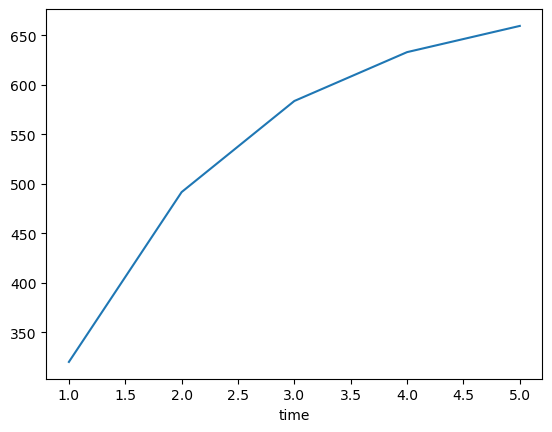

In [8]:
fig = df.plot.line(x="time", y="CLV", legend=False)

Using pandas plotting feature

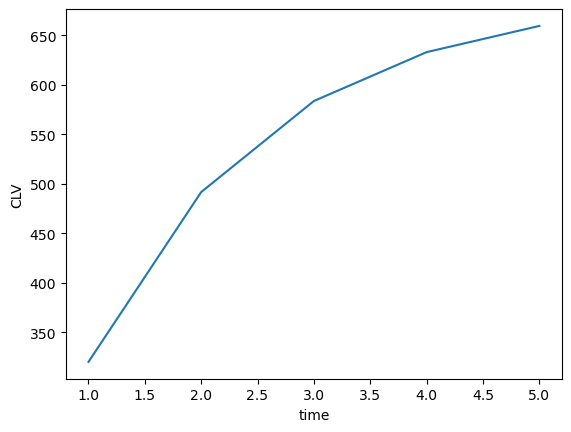

In [9]:
fig = sns.lineplot(x="time", y="CLV", data=df)